In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Load the data, df is already cleaned

df = pd.read_csv(r"..\\data\\data_clean.csv")
sample = pd.read_csv(r"..\\data\\sample_submission.csv")

# Preview sample and data
print("Sample submission preview:")
print(sample.head())
print("\nData preview:")
print(df[['Id', 'Functional', 'FullBath']].head())

# Merge only the sample records
df_merged = sample.merge(df, on='Id', how='left')

# Filter for relevant columns
df_merged = df_merged[['Functional', 'FullBath']]

# Load overview of data
print(df_merged[['Functional', 'FullBath']].info())
print(df_merged[['Functional', 'FullBath']].describe)

# Encode Functional as int64
df_encoded = df_merged[['Functional', 'FullBath']].copy()
df_encoded['Functional_Encoded'] = df_encoded['Functional'].astype('category').cat.codes

# Calculate and print Spearman correlation
corr, p_value = spearmanr(df_encoded['Functional_Encoded'], df_encoded['FullBath'])

print(f"Spearman Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4e}")


Sample submission preview:
     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

Data preview:
     Id Functional  FullBath
0  1461        Typ         1
1  1462        Typ         1
2  1463        Typ         2
3  1464        Typ         2
4  1465        Typ         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Functional  1457 non-null   object
 1   FullBath    1459 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB
None
<bound method NDFrame.describe of      Functional  FullBath
0           Typ         1
1           Typ         1
2           Typ         2
3           Typ         2
4           Typ         2
...         ...       ...
1454        Typ         1
1455        Typ         1
1456        Typ         1
1457        Typ         1
1458

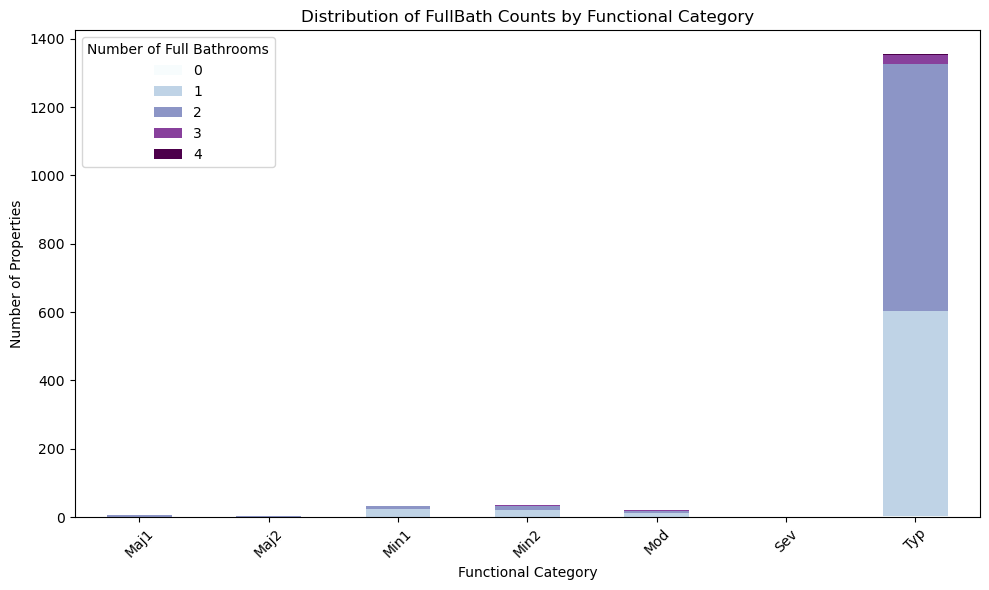

In [38]:

# Group and plot the data
grouped = df_merged.groupby('Functional')['FullBath'].value_counts().unstack()
grouped = grouped.sort_index()

grouped.plot(kind='bar', stacked=True, figsize=(10,6), colormap='BuPu')

# Add labels to plot
plt.title('Distribution of FullBath Counts by Functional Category')
plt.xlabel('Functional Category')
plt.ylabel('Number of Properties')
plt.legend(title='Number of Full Bathrooms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()